In [1]:
library("dplyr")
library("readr")
library("tidyverse")
library("astsa")

options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Obligatorio - Series Temporales
## Análisis de incendios en Brasil (1998-2017)
### Nicolás Eiris - Ignacio Fiori - Sebastián Otte

In [2]:
df = read_csv(
 "amazon.csv", 
 col_types = cols(
   month = col_factor(
           levels = c("Janeiro", "Fevereiro",  
                      parse_character("Mar\xe7o", locale = locale(encoding = "ISO-8859-1")), 
                      "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", 
                      "Outubro", "Novembro", "Dezembro")), 
   state = col_factor(levels = c("Acre", "Alagoas", "Amapa", 
                                 "Amazonas", "Bahia", "Ceara", 
                                 "Distrito Federal", "Espirito Santo", 
                                 "Goias", "Maranhao", "Mato Grosso", 
                                 "Minas Gerais", 
                                 parse_character("Par\xe1", 
                                                 locale = locale(encoding = "ISO-8859-1")), 
                                 "Paraiba", "Pernambuco", "Piau", "Rio", "Rondonia", 
                                 "Roraima", "Santa Catarina", "Sao Paulo", 
                                 "Sergipe", "Tocantins")),
   date = col_date(format = "%Y-%m-%d"),
   year = col_factor(levels = c("1998", "1999", "2000", "2001", "2002", "2003","2004",
                                "2005", "2006", "2007", "2008","2009", "2010", "2011", 
                                "2012", "2013", "2014", "2015", "2016", "2017"))
   ), 
 locale = locale(encoding = "ISO-8859-1", grouping_mark = "." ))

In [3]:
head(df)

year,state,month,number,date
<fct>,<fct>,<fct>,<dbl>,<date>
1998,Acre,Janeiro,0,1998-01-01
1999,Acre,Janeiro,0,1999-01-01
2000,Acre,Janeiro,0,2000-01-01
2001,Acre,Janeiro,0,2001-01-01
2002,Acre,Janeiro,0,2002-01-01
2003,Acre,Janeiro,10,2003-01-01


##### Parse date from year & month

In [4]:
parse_date = function(row) {
    year = row["year"]
    month = row["month"]
    month_num = -1
    if (month == "Janeiro") {
        month_num = "01" 
    } else if (month == "Fevereiro") {
        month_num = "02"
    } else if (month == "Março") {
        month_num = "03"
    } else if (month == "Abril") {
        month_num = "04"
    } else if (month == "Maio") {
        month_num = "05"
    } else if (month == "Junho") {
        month_num = "06"
    } else if (month == "Julho") {
        month_num = "07"
    } else if (month == "Agosto") {
        month_num = "08"
    } else if (month == "Setembro") {
        month_num = "09"
    } else if (month == "Outubro") {
        month_num = "10"
    } else if (month == "Novembro") {
        month_num = "11"
    } else if (month == "Dezembro") {
        month_num = "12"
    }
    paste(year, month_num, "01",sep="-")
}
df$date = apply(df, 1, parse_date)
head(df)

year,state,month,number,date
<fct>,<fct>,<fct>,<dbl>,<chr>
1998,Acre,Janeiro,0,1998-01-01
1999,Acre,Janeiro,0,1999-01-01
2000,Acre,Janeiro,0,2000-01-01
2001,Acre,Janeiro,0,2001-01-01
2002,Acre,Janeiro,0,2002-01-01
2003,Acre,Janeiro,10,2003-01-01


#### Keep target & date columns

In [5]:
brasil = df %>%
  group_by(year, month) %>%
  summarise(number = sum(number))

brasil$date = apply(brasil, 1, parse_date)
brasil

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,month,number,date
<fct>,<fct>,<dbl>,<chr>
1998,Janeiro,0,1998-01-01
1998,Fevereiro,0,1998-02-01
1998,Março,0,1998-03-01
1998,Abril,0,1998-04-01
1998,Maio,0,1998-05-01
1998,Junho,3551,1998-06-01
1998,Julho,8066,1998-07-01
1998,Agosto,35549,1998-08-01
1998,Setembro,41968,1998-09-01


In [6]:
brasil = brasil[, c("date", "number")]

In [7]:
brasil <- brasil[order(brasil$date),]

In [8]:
brasil_ts <- ts(brasil$number, 
            start=c(1998, 1), 
            end=c(2017, 11),
            frequency = 12)

brasil_ts <- ts(tail(brasil_ts,-5), 
            start=c(1998, 6), 
            end=c(2017, 11),
            frequency = 12)
print(brasil_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1998                                      3551   8066  35549  41968  23495
1999   1081   1284    667    717   1812   3632   8756  38415  36913  27012
2000    778    561    848    537   2097   6275   4739  22202  22319  24321
2001    547   1059   1268   1081   2090   8433   6490  31887  32193  31038
2002   1654   1570   1679   1682   3818  10839  13751  55099  49566  47722
2003   5091   2398   2749   2677   1747   6506  11804  37382  55913  43295
2004   2705   1255   2040   1335   3535  14262  23809  48038  70531  36002
2005   4990   2153   1706   1011   3210   5811  15663  39912  74574  49876
2006   3255   1666   1774    792    808   1968   5722  29443  41264  21854
2007   3055   1751   2136    415   1286   3956   6197  66837  78299  27911
2008   2125   1275   1239   1253    553   1287   4507  14528  35836  37617
2009   2848   1140   1392   1078   2593   2962   6599  15534  25002  24202
2010   2851   2386   2417

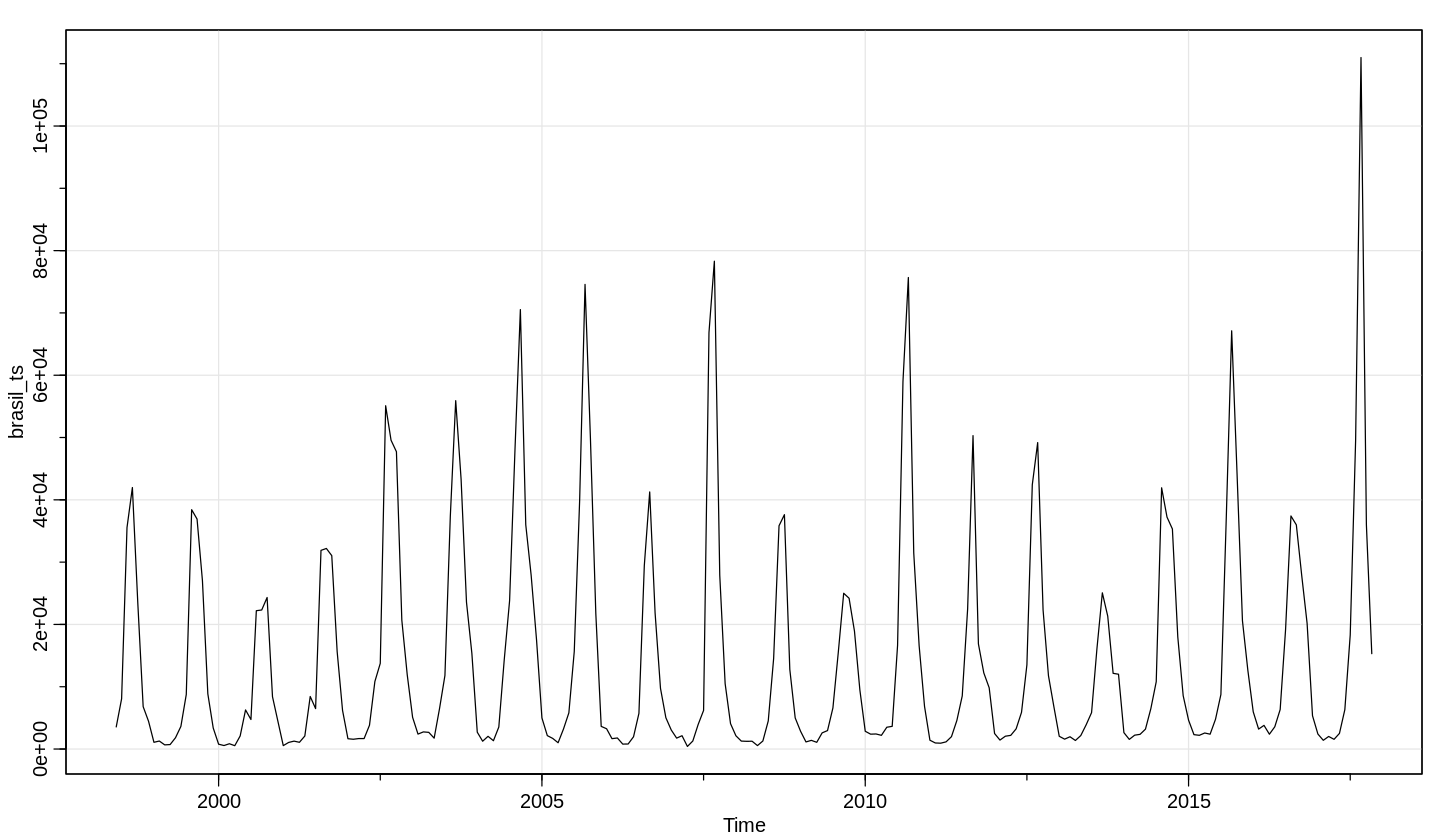

In [9]:
tsplot(brasil_ts)

## Estacionalidad de la serie temporal

Esta serie parece ser estacionaria?

- No parece ser estacionaria ya que los tiempos de los picos superiores son mucho menores que los picos inferiores(se mantienen más en el tiempo) lo que habla de una varianza no constante.

En busca de una serie estacionaria un primer paso sería eliminar el crecimiento de la señal. Se observa una periodicidad anual en la serie y también se puede afirmar en primera instancia que no existe un crecimiento a lo largo del tiempo que lleve a aplicar `diff` sobre la serie temporal.

Lo que si se puede realizar como primer paso es aplicar `log` a los valores de la serie ya que presenta fluctuaciones considerables en los valores. Por tanto procedemos a aplicar esta operación y observar la serie resultante.

Como los primeros 5 valores son 0 (`log(0)= -Inf`) tomamos la decisión de sustituirlos por la media de la serie excluyendo estos primeros 5 valores.

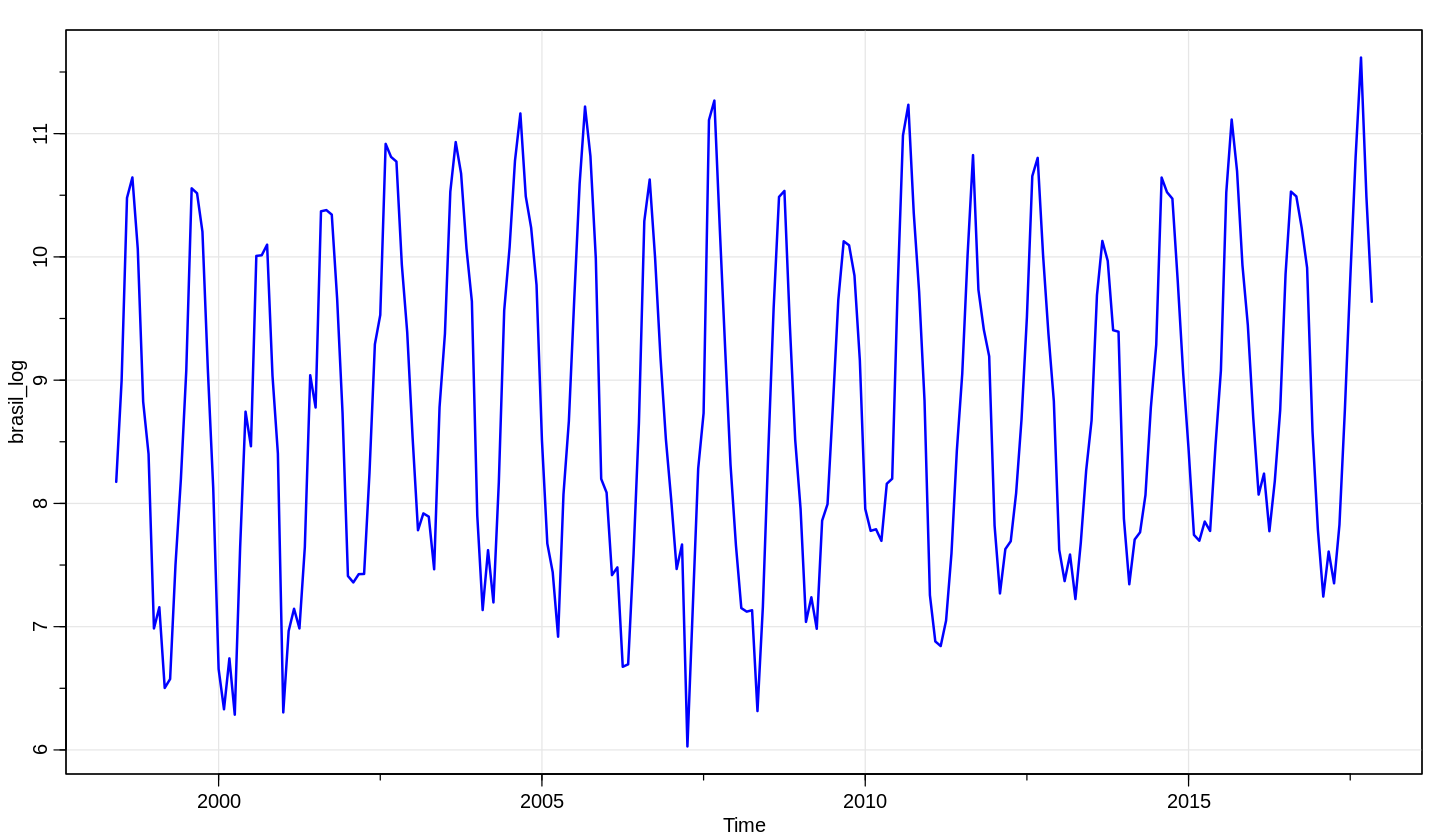

In [10]:
#brasil_ts[1:5] = replicate(5, mean(brasil_ts[6:length(brasil_ts)]))
brasil_log = log(brasil_ts)
tsplot(brasil_log, col=4, lwd=2)

El resultado de la operación `log` sobre la serie parece dar muy buenos resultados ya que nuestro objetivo es trabajar a partir de una serie estacionaria y vemos que la misma presenta todas las características de estacioneidad. Tanto la media como la varianza muestran signos de ser constantes a lo largo del tiempo.

Dada esta afirmación, lo único que resta por aplicar es centrar la media en 0 para poder comenzar el análisis desde este punto.

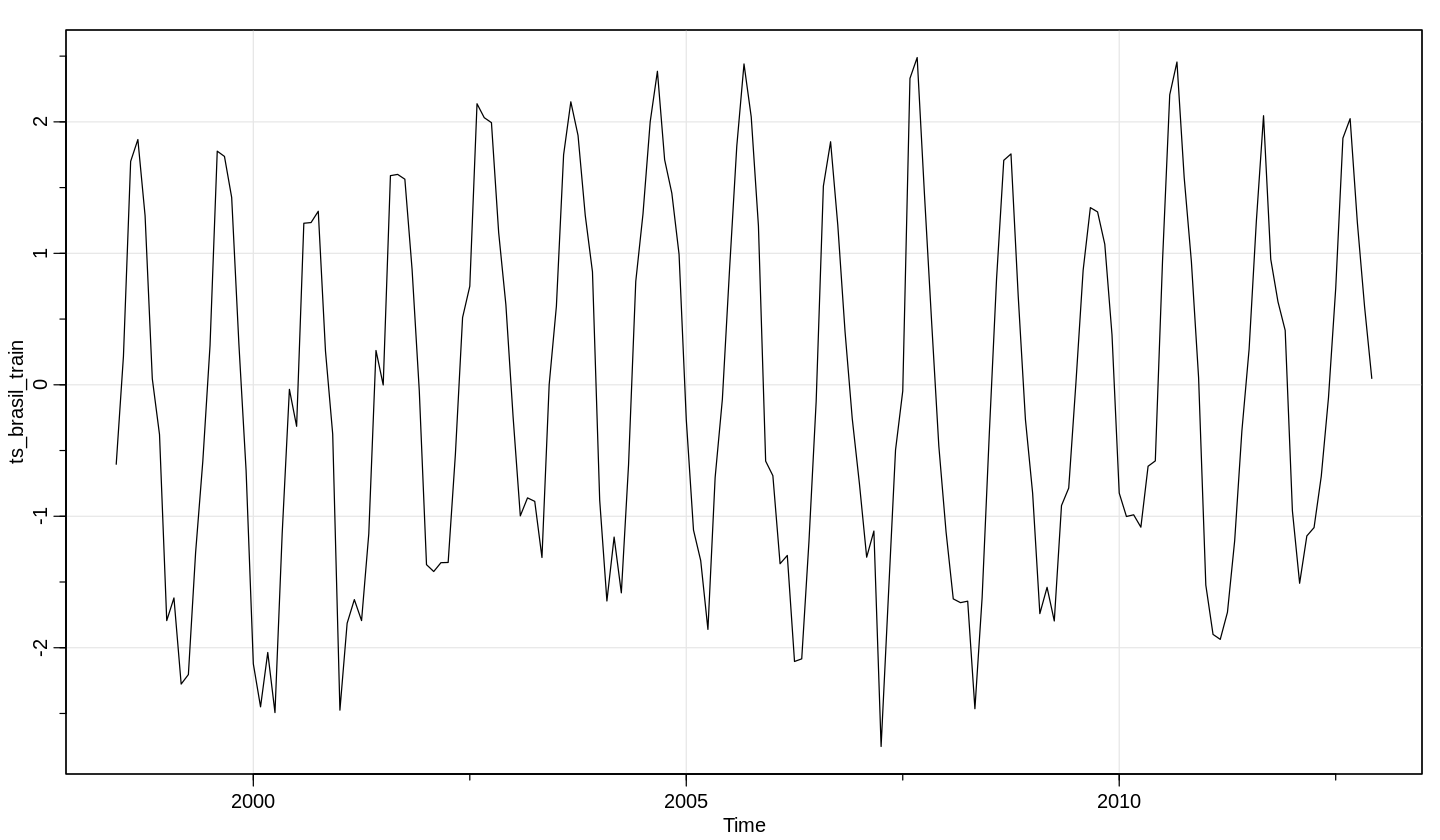

In [23]:
ts_brasil = brasil_log - mean(brasil_log)

#Separamos dataset en train y test
ts_brasil_train <- ts(ts_brasil[1:175], 
            start=c(1998, 6), 
            end=c(2012, 12),
            frequency = 12)
ts_brasil_test <- ts(ts_brasil[176:length(ts_brasil)], 
            start=c(2013, 1), 
            end=c(2017, 11),
            frequency = 12)
tsplot(ts_brasil_train)

## Análisis de la serie temporal estacionaria

Como primeros pasos del análisis interesa:

- Estudiar la varianza (acf & pacf)
- Tener una noción del orden de la serie (periodograma)

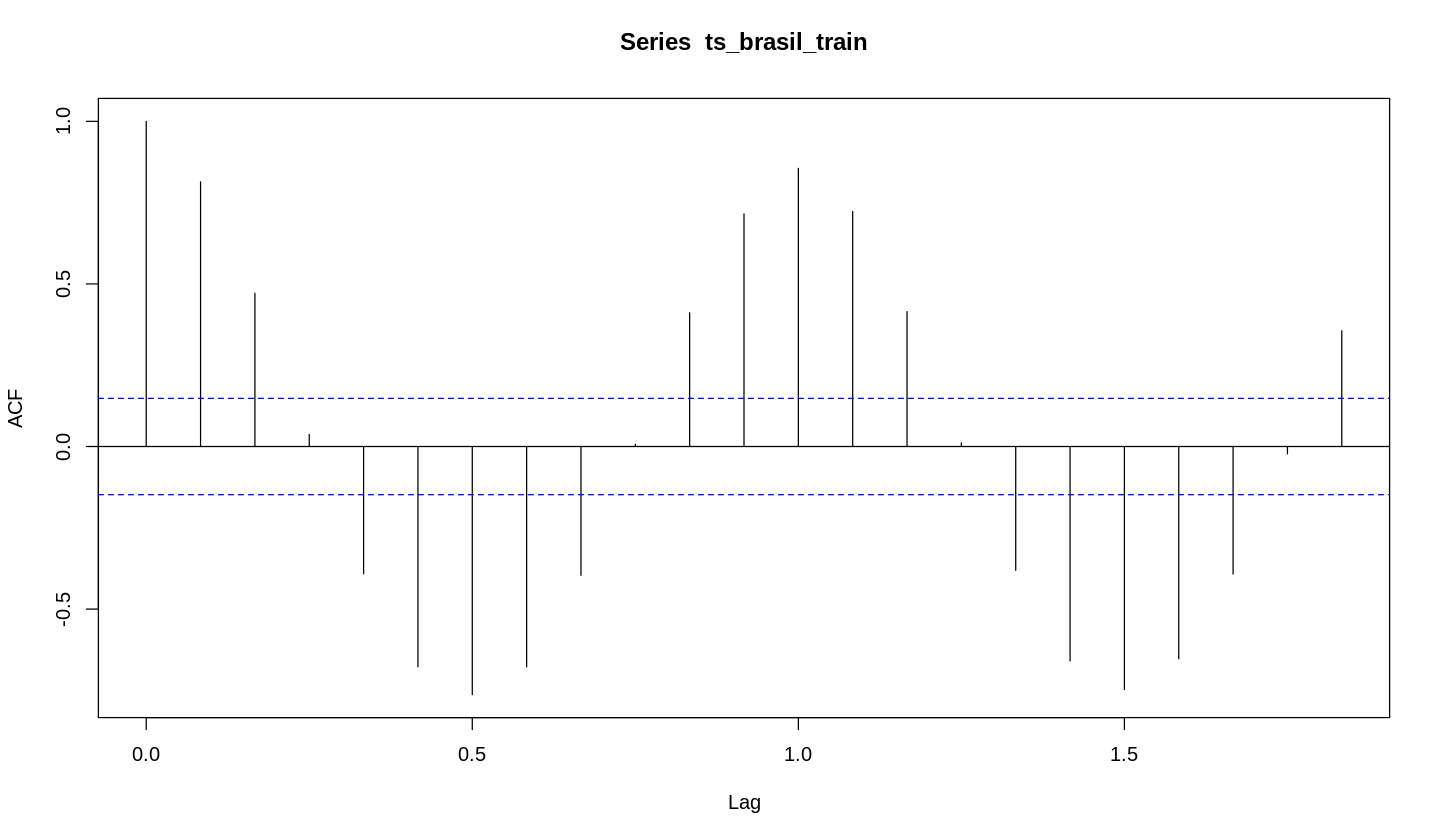

In [12]:
acf(ts_brasil_train)

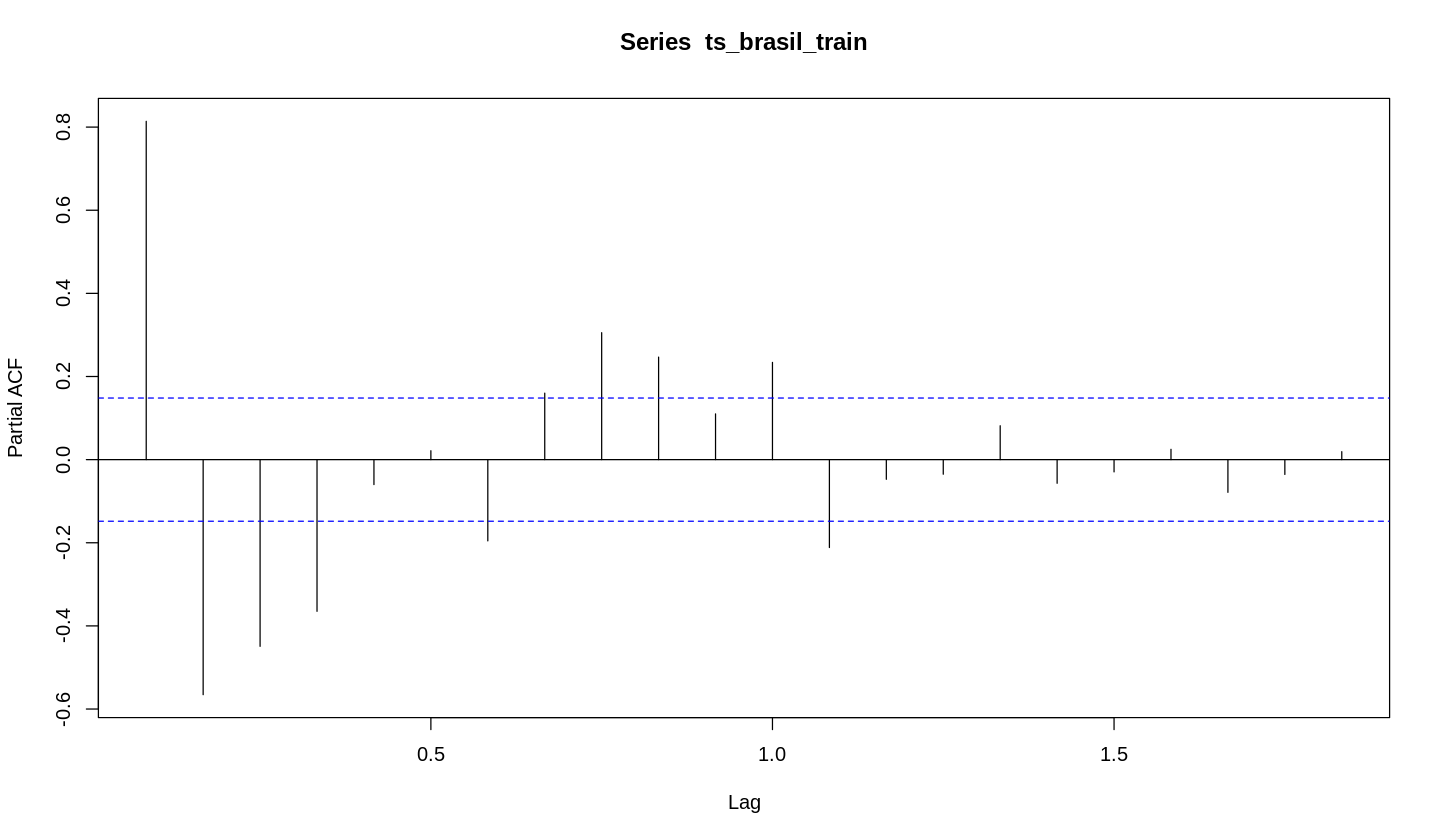

In [13]:
pacf(ts_brasil_train)

Tanto el `acf` como el `pacf` no aportan información relevante acerca de la serie. Por lo que calcularemos el periodograma y en base a eso evaluar ajustar un modelo lineal con las frecuencias estimadas con el periodograma.

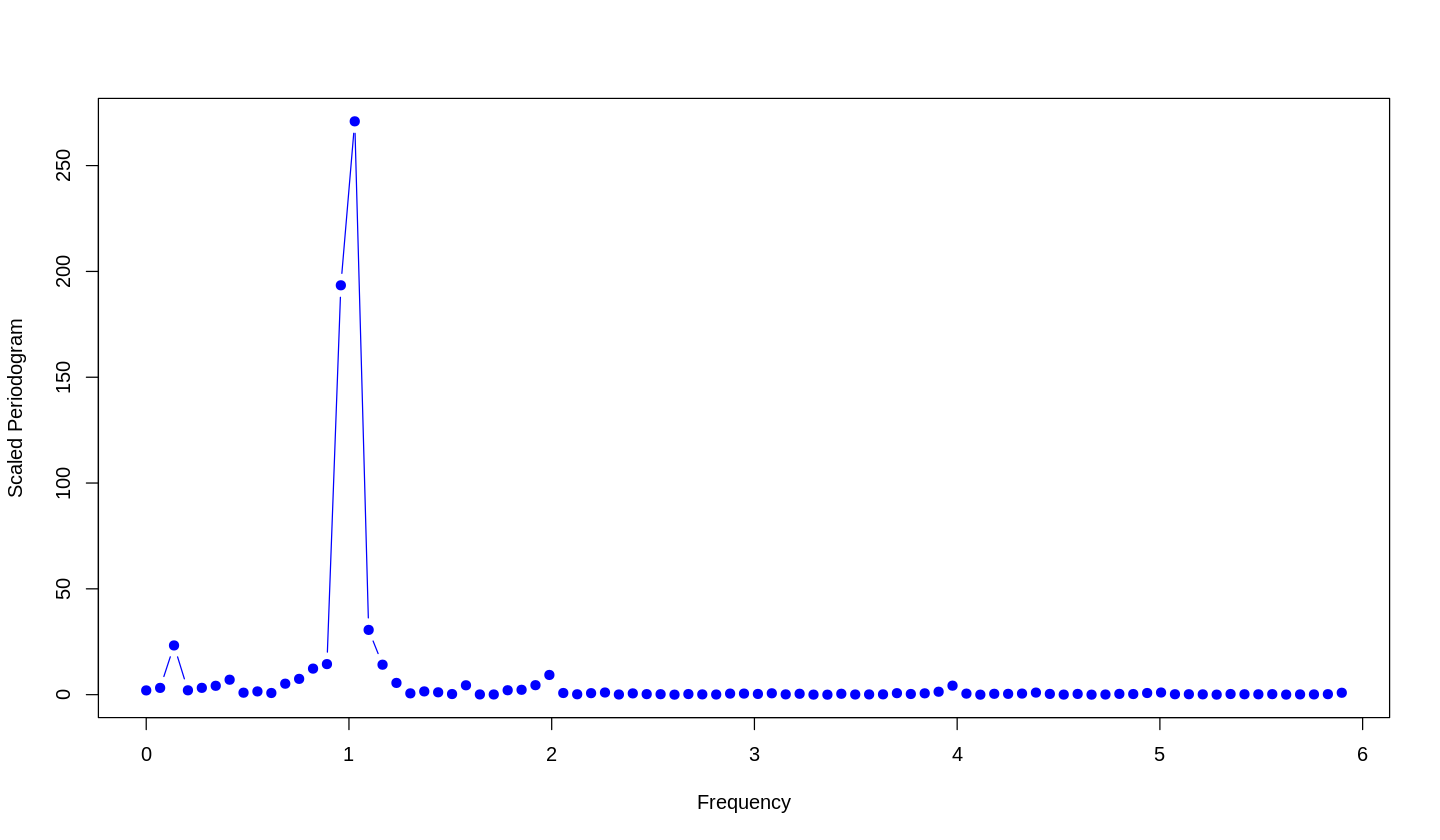

In [14]:
n = length(ts_brasil_train)

P = 4/n*abs(fft(ts_brasil_train))^2
P = P[1:floor(n/2)]

f = (0:(n/2-1))/n*12

plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", col=4, lwd=1, pch=19)

Del periodograma se puede observar una componente anual bien definida lo que creemos conlleva a un ajuste lineal del estilo:

` model = [a1 * sin(2 * pi * 1) * t] + [a2 * cos(2 * pi * 1) * t]`

Donde debería ajustar tanto `a1` como `a2` utilizando la frecuencia obtenida del periodograma.

In [15]:
t = time(ts_brasil_train)
fit = lm(ts_brasil_train ~ sin(2 * pi * (1) * t) + cos(2 * pi * (1) * t) )
summary(fit)


Call:
lm(formula = ts_brasil_train ~ sin(2 * pi * (1) * t) + cos(2 * 
    pi * (1) * t))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60268 -0.33583  0.02384  0.37668  1.01688 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.09176    0.03975  -2.309   0.0222 *  
sin(2 * pi * (1) * t) -1.61095    0.05628 -28.622   <2e-16 ***
cos(2 * pi * (1) * t) -0.78021    0.05611 -13.905   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5255 on 172 degrees of freedom
Multiple R-squared:  0.8543,	Adjusted R-squared:  0.8526 
F-statistic: 504.2 on 2 and 172 DF,  p-value: < 2.2e-16


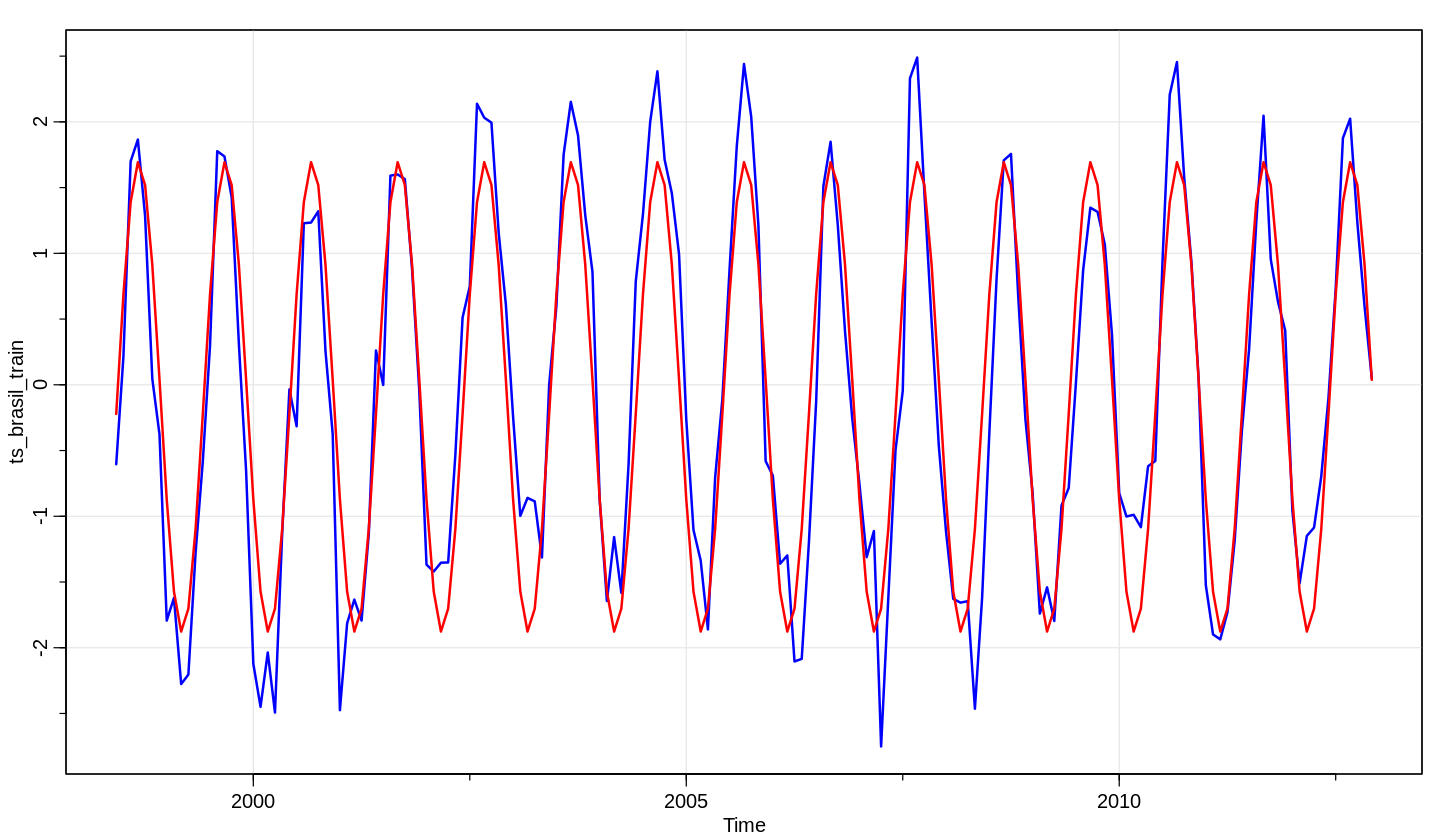

In [16]:
predictions = ts(fitted(fit), start=1998+5/12, frequency=12)
tsplot(ts_brasil_train, col=4, lwd=2)
lines(predictions, col=2, lwd=2)

Observamos como la frecuencia retornada por el periodograma es un muy buen inicio ya que la regresión lineal considera  los términos de `sin` y `cos` muy significativos, también los residuos son bastantes bajos y el R-squared de 0.8 da la pauta de un primer acercamiento al ajuste deseado.

Podemos observar que hace/n falta componente/s de baja frecuencia para ajustar aún mejor la señal estudiada.

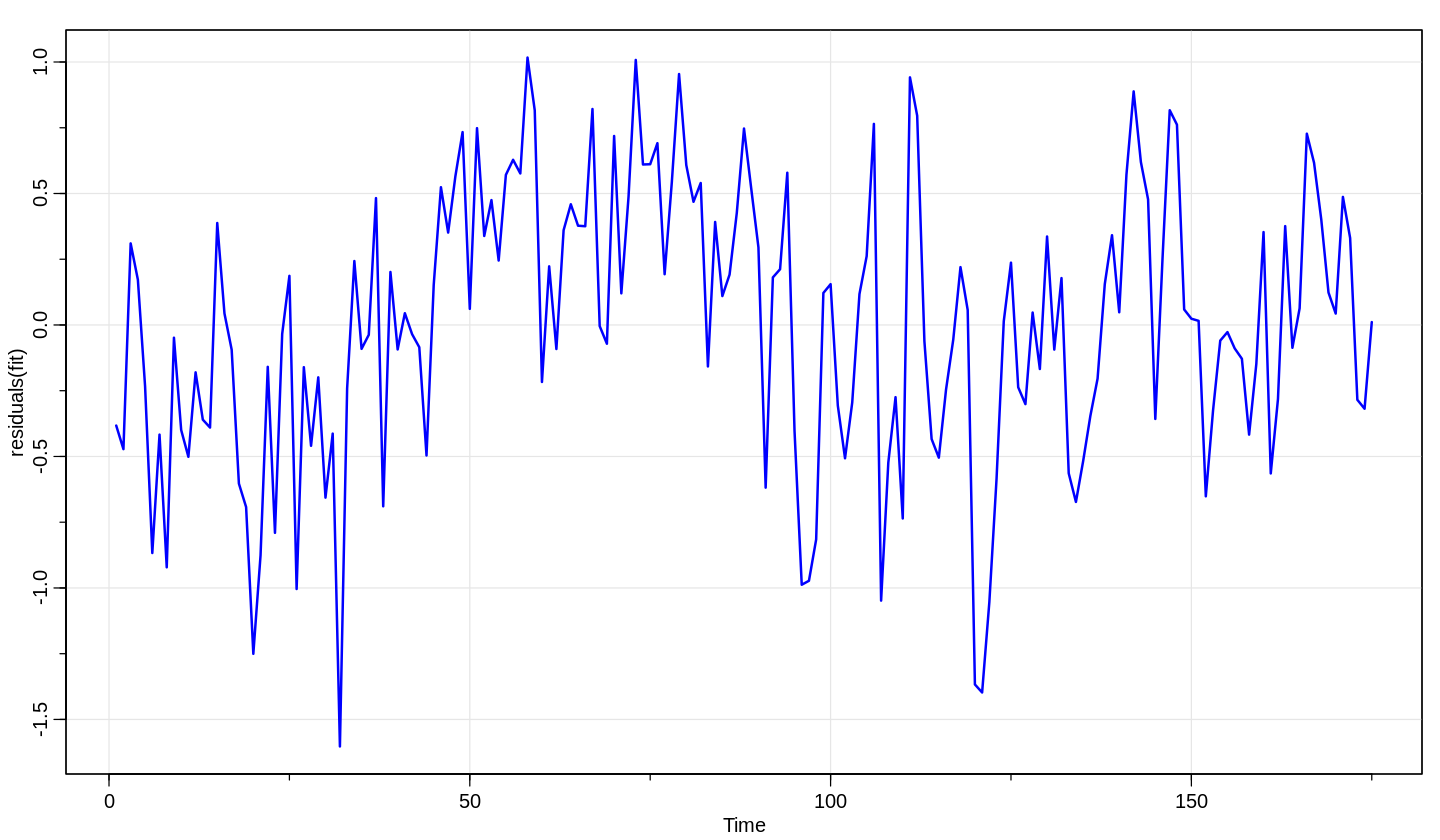

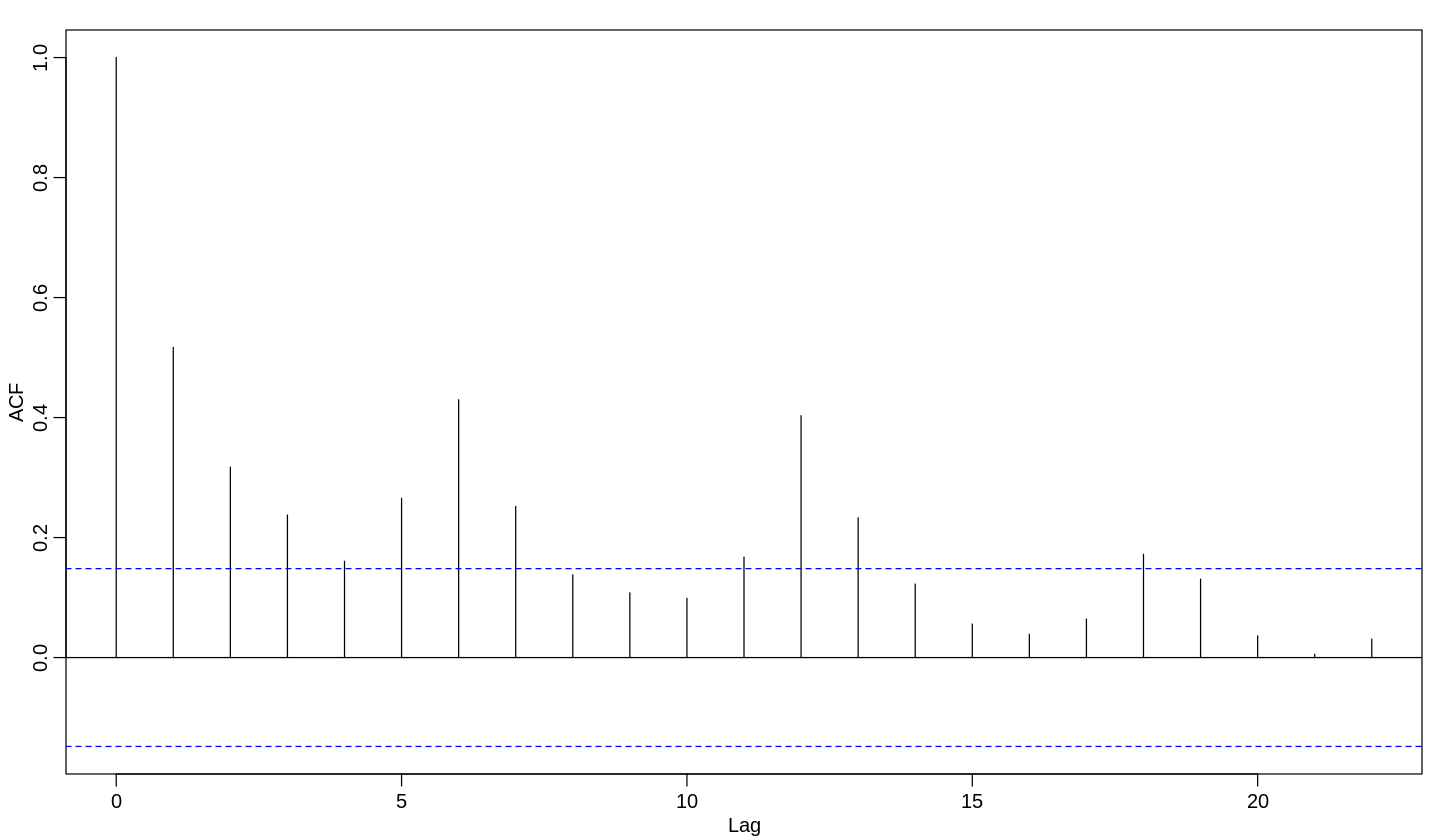

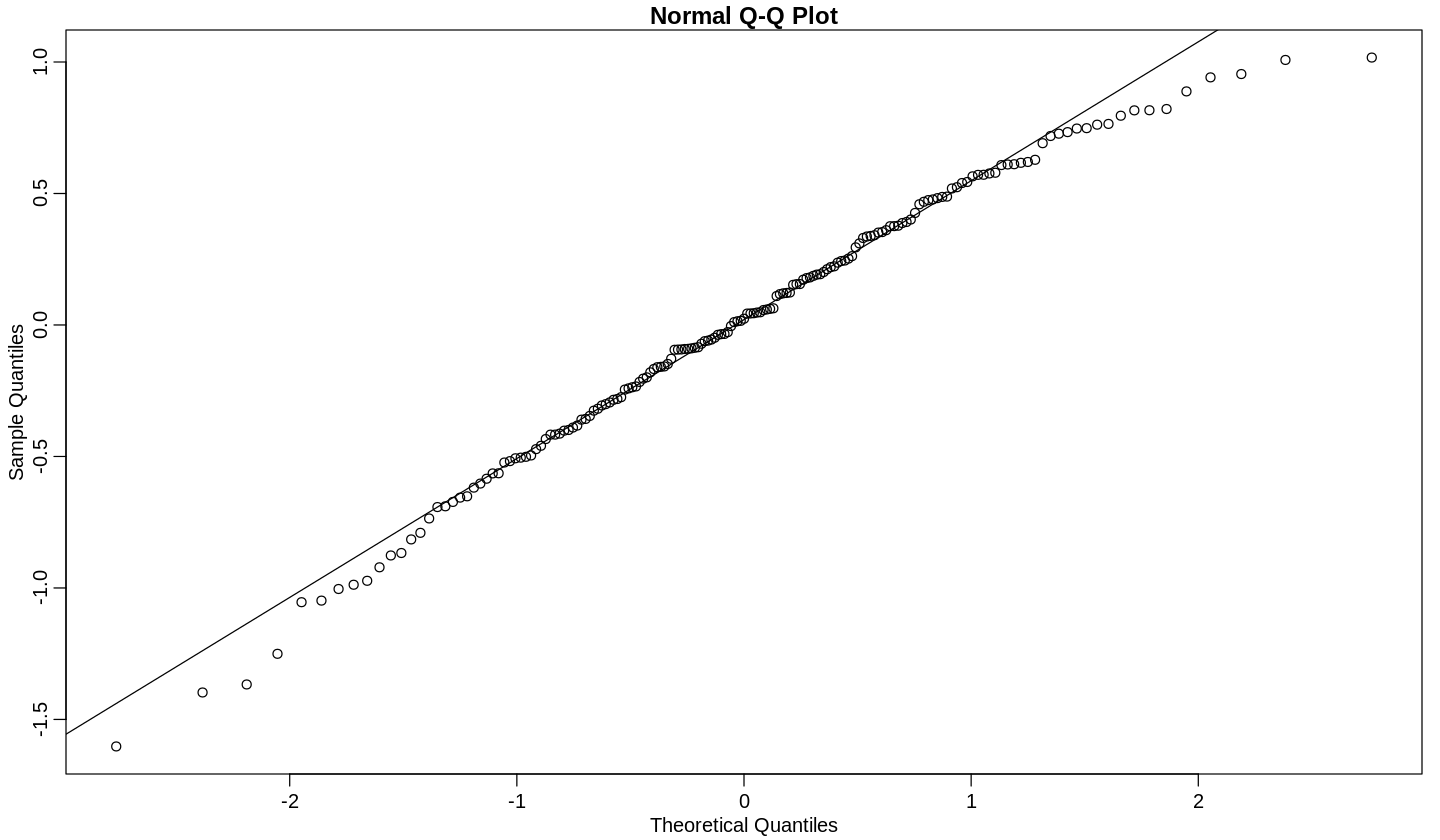

In [17]:
#Ploteamos los residuis para nuestro ajuste fit
tsplot(residuals(fit), col=4, lwd=2)

#Analizamos si es ruido blanco
acf(residuals(fit))
qqnorm(residuals(fit))
qqline(residuals(fit))

Podemos ver a partir del análisis de los residuos, que estos todavía tienen información relevante de los datos, y es por tanto que decidimos agregar complegidad a nuestro modelo, agregando las componentes de baja frecuencia que habíamos visto en el períodograma inicial.

In [18]:
#Se toman las frecuancias más significativas de nuestra serie: 1, 0.15, 0.10
t = time(ts_brasil_train)
fit2 = lm(ts_brasil_train ~ sin(2 * pi * (1) * t) + cos(2 * pi * (1) * t) + sin(2 * pi * (0.15062762) * t) + cos(2 * pi * (0.15062762) * t)+sin(2 * pi * (0.10041841) * t) + cos(2 * pi * (0.10041841) * t))
summary(fit2)


Call:
lm(formula = ts_brasil_train ~ sin(2 * pi * (1) * t) + cos(2 * 
    pi * (1) * t) + sin(2 * pi * (0.15062762) * t) + cos(2 * 
    pi * (0.15062762) * t) + sin(2 * pi * (0.10041841) * t) + 
    cos(2 * pi * (0.10041841) * t))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31685 -0.24747  0.01989  0.28110  1.22943 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.04346    0.03580  -1.214    0.226    
sin(2 * pi * (1) * t)          -1.61275    0.04738 -34.039  < 2e-16 ***
cos(2 * pi * (1) * t)          -0.78126    0.04723 -16.543  < 2e-16 ***
sin(2 * pi * (0.15062762) * t) -0.22391    0.05170  -4.331 2.55e-05 ***
cos(2 * pi * (0.15062762) * t)  0.07699    0.05052   1.524    0.129    
sin(2 * pi * (0.10041841) * t)  0.29336    0.05224   5.615 7.98e-08 ***
cos(2 * pi * (0.10041841) * t) -0.03424    0.05165  -0.663    0.508    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

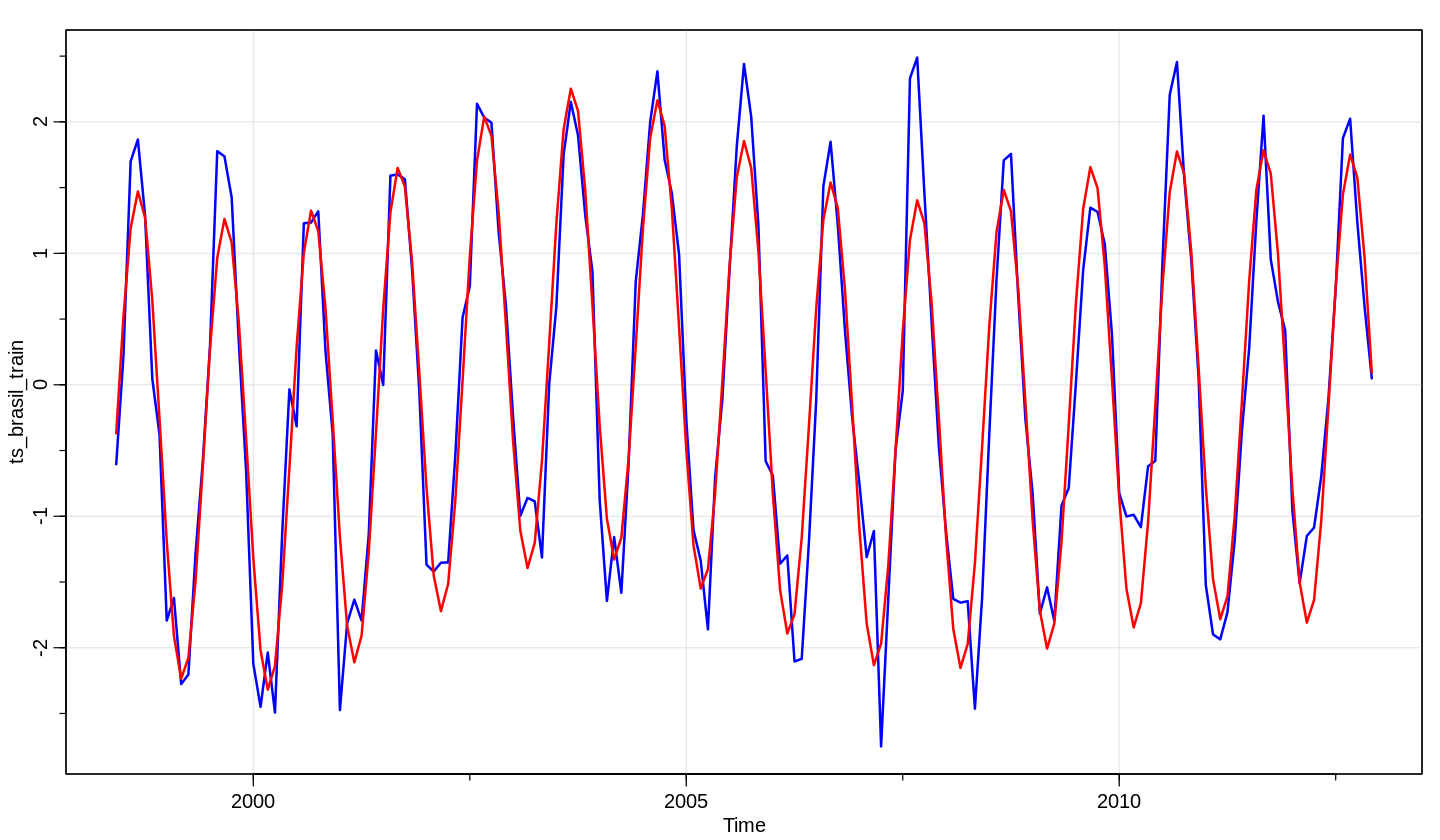

In [25]:
predictions2 = ts(fitted(fit2), start=1998+5/12, frequency=12)
tsplot(ts_brasil_train, col=4, lwd=2)
lines(predictions2, col=2, lwd=2)

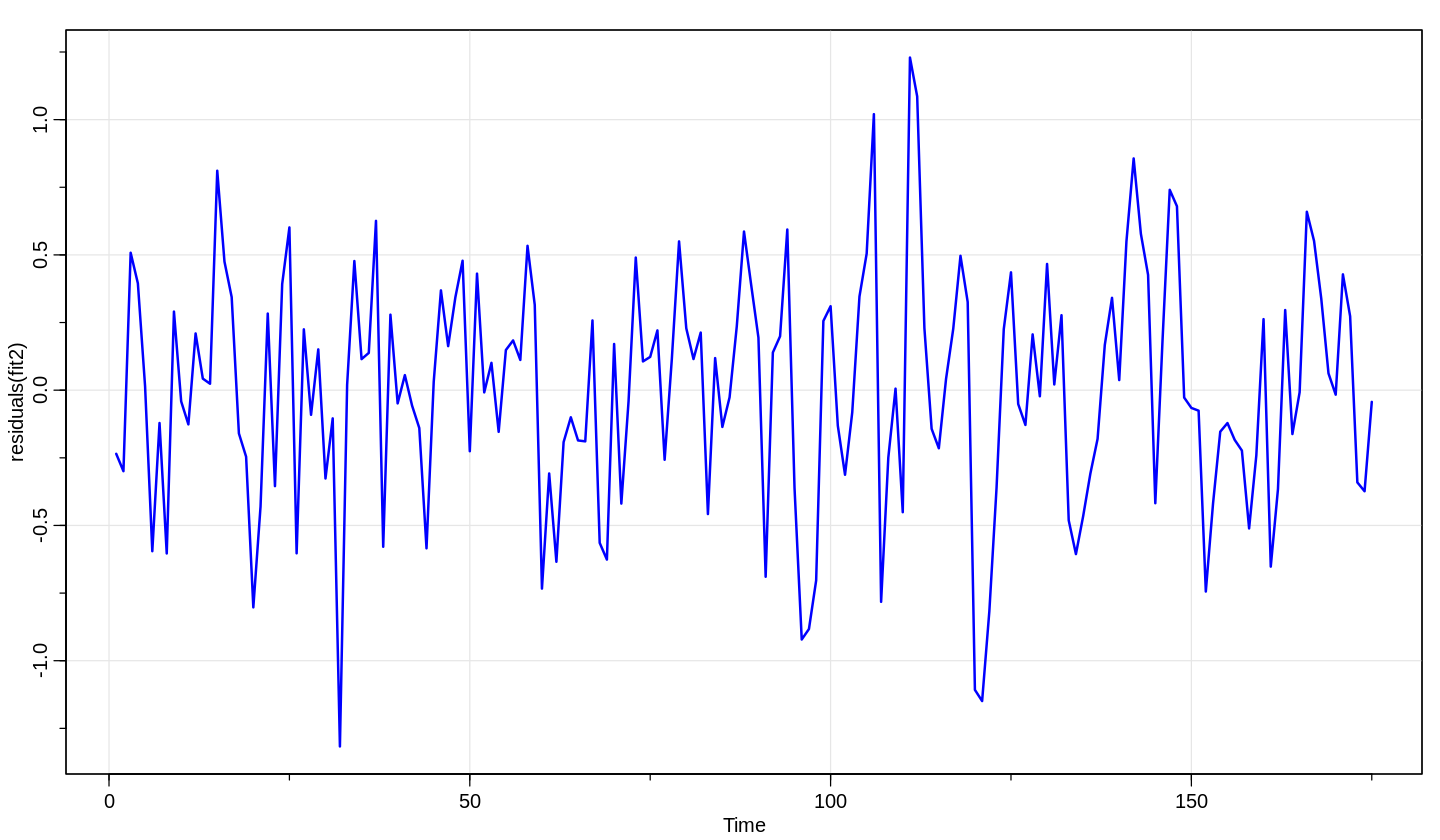

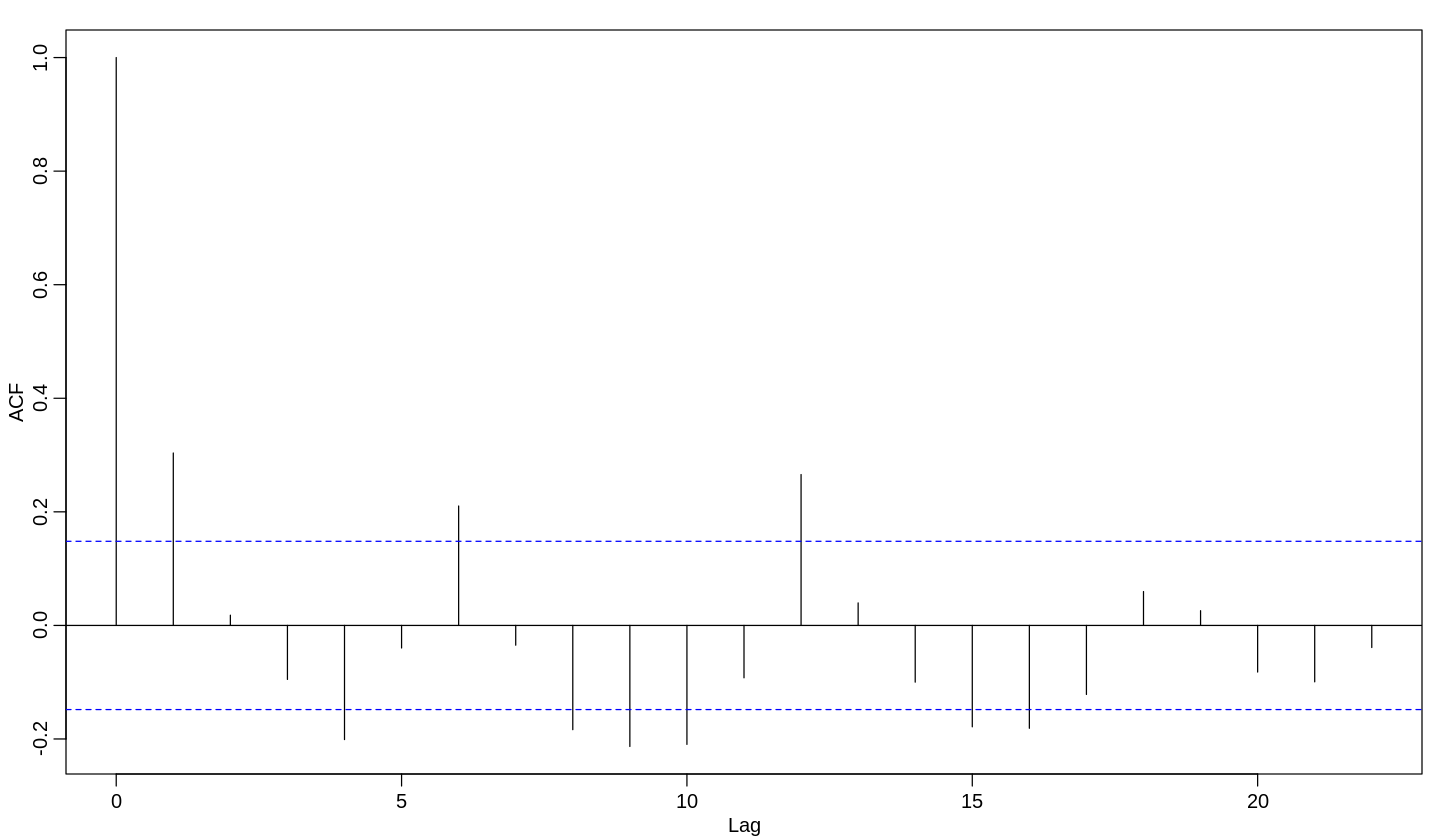

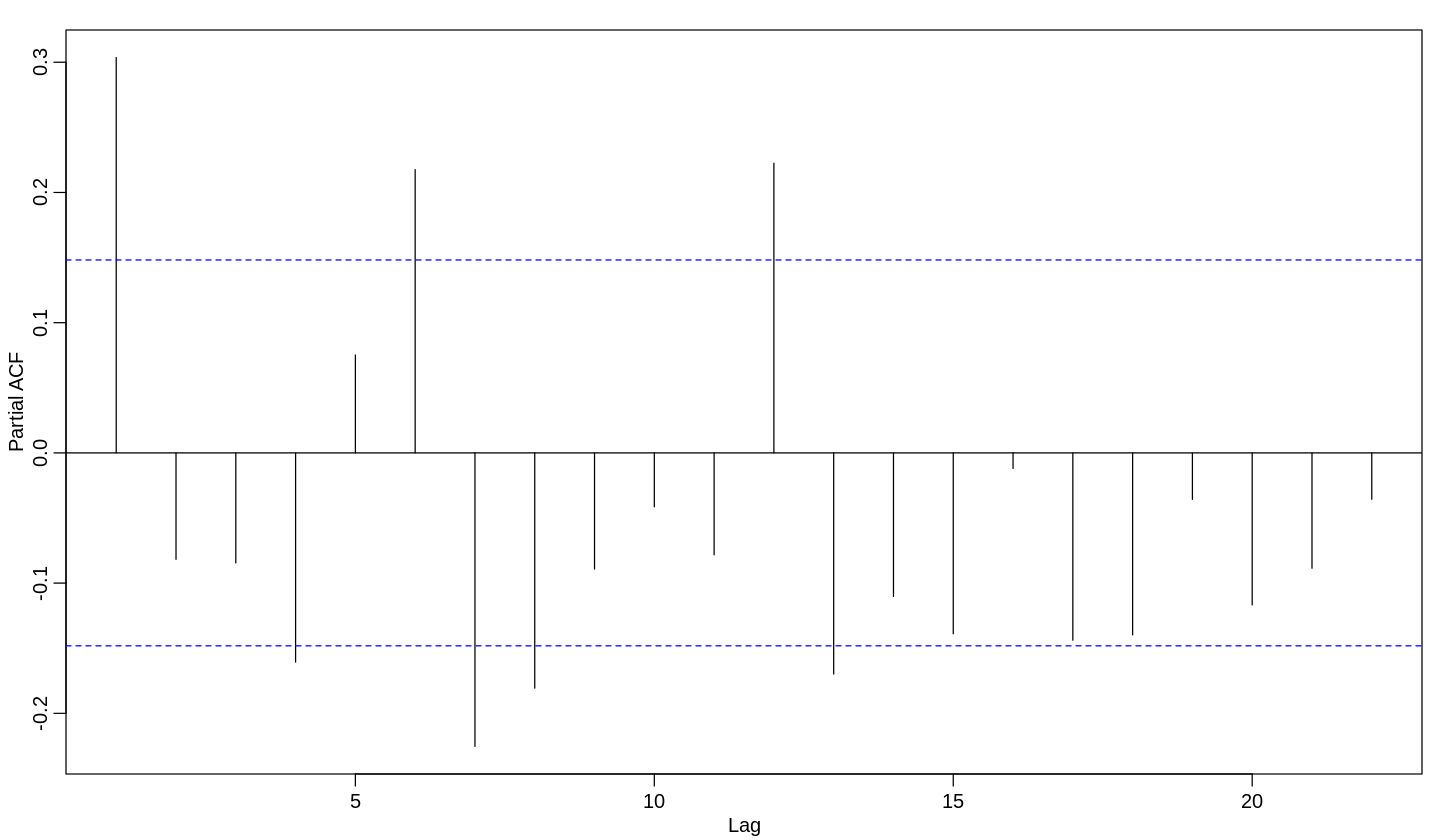

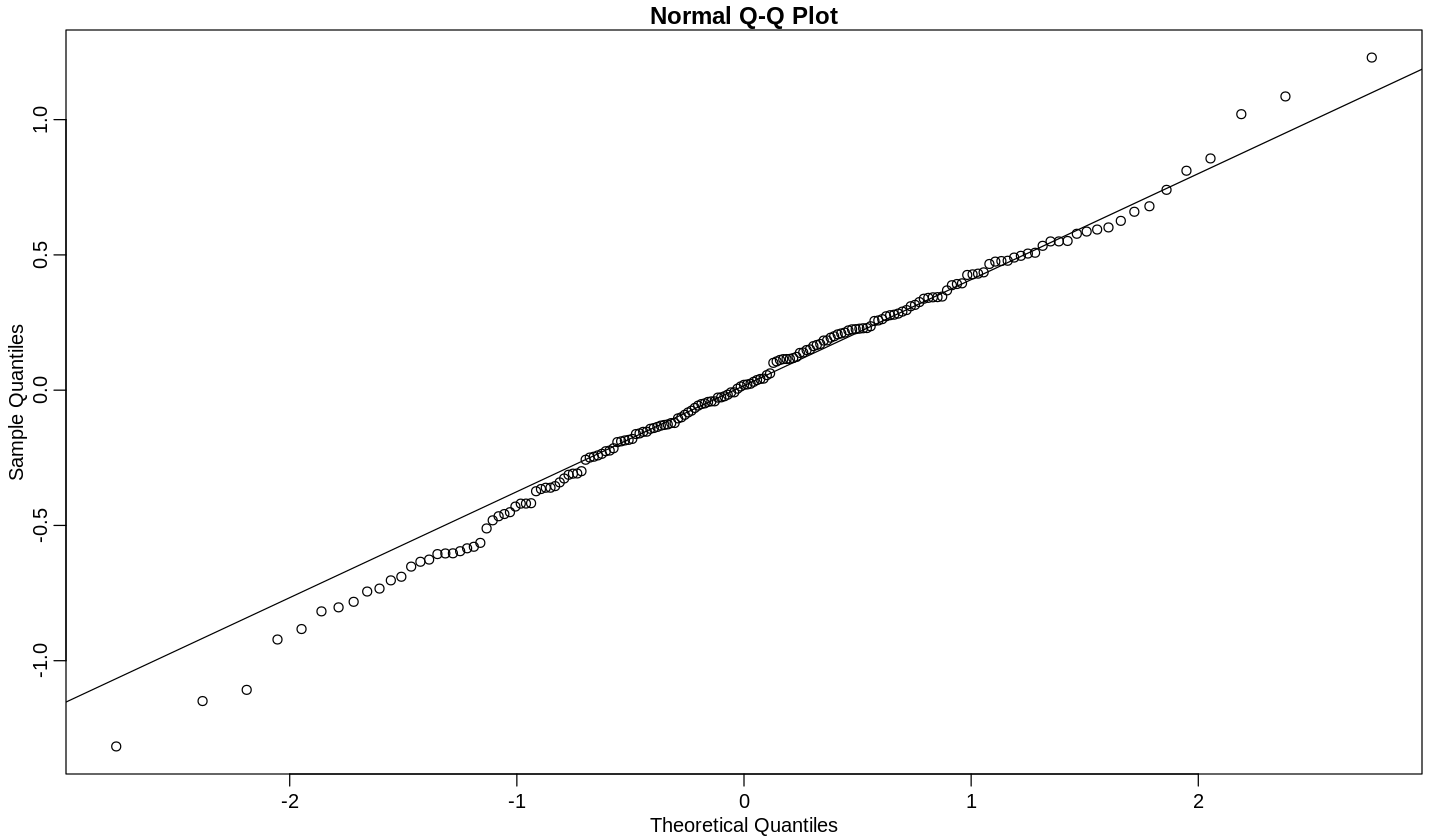

In [20]:
#Ploteamos los residuis para nuestro ajuste fit
tsplot(residuals(fit2), col=4, lwd=2)

#Analizamos si es ruido blanco
acf(residuals(fit2))
pacf(residuals(fit2))
qqnorm(residuals(fit2))
qqline(residuals(fit2))

En base al ajuste y observando la gráfica, podemos afimar que este segundo ajuste, a pesar de ser mas específico tiene mejores resultados que el inicial

### Probamos ajuste de residuos mediente AR(1) y ARMA(1,1) 

In [21]:
fit3 = arima(residuals(fit2),order = c(1,0,0),include.mean=F)

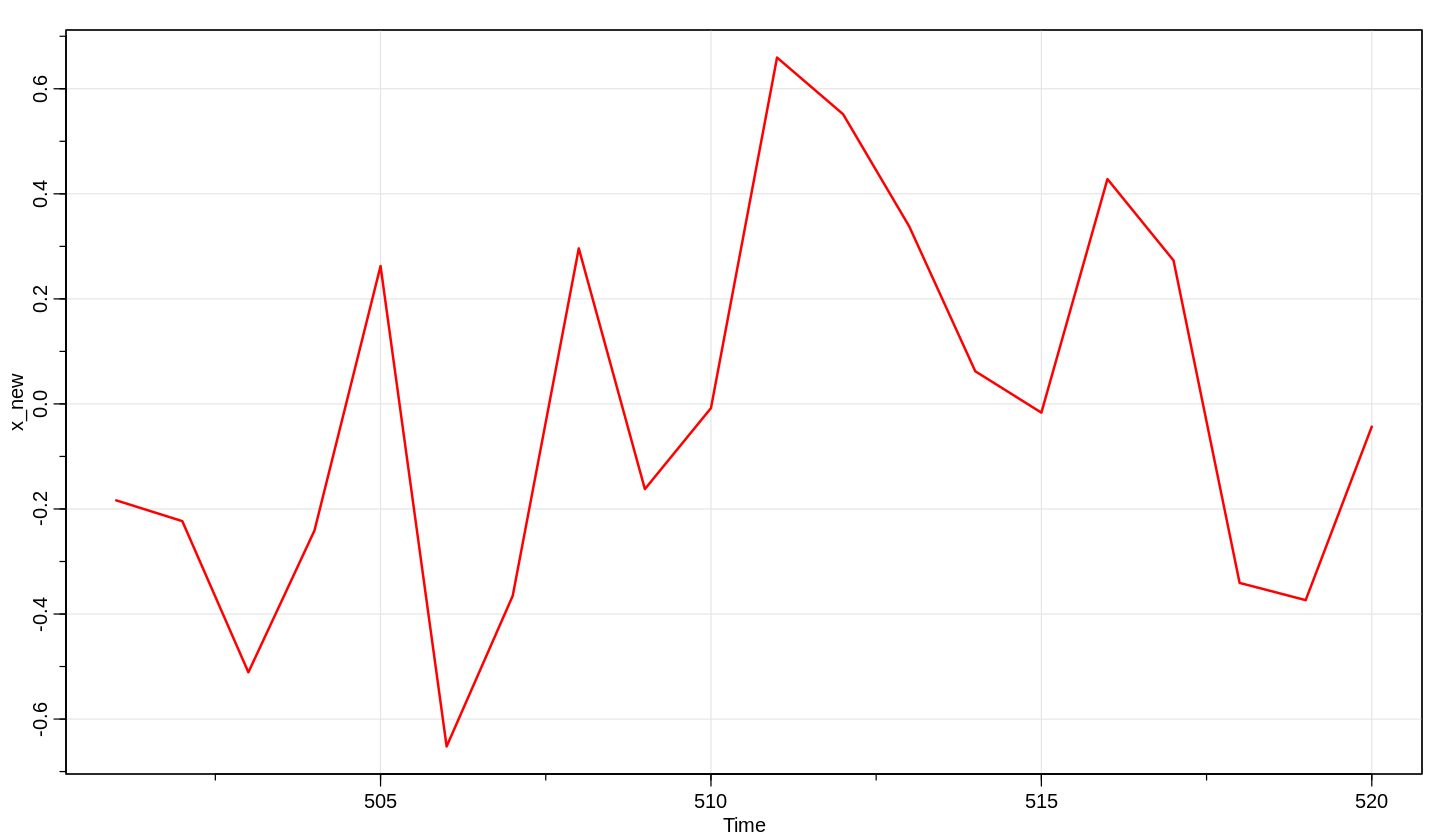

In [22]:
predictions = predict(fit3, n.ahead = 20)
x_hat = predictions$pred
se = predictions$se
x_new = ts(tail(residuals(fit2),20),start=501)
tsplot(x_new,col="red", lwd=2)
lines(x_hat,col="blue", lwd=2)
lines(x_hat+se,col="blue", lwd=1)
lines(x_hat-se,col="blue", lwd=1)